In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the csv file and set the dataframe
df = pd.read_csv("/content/drive/MyDrive/fast_food/fastfood.csv")

In [4]:
#checκ the head so i can have a picture of the dataframe
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


# **Objectives**

Find and remove the outliers from three columns, 'cholesterol' ,'sugar','protein, using the IQR Method.

Compare the Aggregate functions of these columns before and after the removal.


# **REMOVE OUTLIERS**

In [5]:
#find the q1,q3 of the three columns so later can detect the outliers with the IQR method
column=['cholesterol' ,'sugar','protein']
for x in column:
  Q1 = df[x].quantile(0.25)  #using the quantile function to find the value at the first quartile of the dataset data.
  Q3 = df[x].quantile(0.75)  #same for the third quartile
  IQR = Q3 - Q1
  print(f'the results for {x}:\nQ1_{x}={Q1}\nQ3_{x}={Q3}\nIQR_{x}={IQR}\n')

the results for cholesterol:
Q1_cholesterol=35.0
Q3_cholesterol=95.0
IQR_cholesterol=60.0

the results for sugar:
Q1_sugar=3.0
Q3_sugar=9.0
IQR_sugar=6.0

the results for protein:
Q1_protein=16.0
Q3_protein=36.0
IQR_protein=20.0



We are identifying outliers in the data. These outliers are values that fall below Q1 - 1.5 IQR or above Q3 + 1.5 IQR. All three columns the result of Q1-1.5IQR is negative but  we don't have negative values so we will not use it.



In [6]:
#Q3 + 1.5IQR = 95 +60*1.5 = 95 + 90 = 185
mask_chol = (df['cholesterol'] >= 185)  #create a mask for values above 185
oultiers_chol = pd.DataFrame(df[mask_chol]['cholesterol']) #make a new dataframe with those masks
oultiers_chol

,cholesterol
2,220
37,240
38,295
39,475
44,295
47,265
69,285
98,260
99,235
100,235


In [7]:
#Q3 + 1.5IQR = 9 + 6*1.5 = 9 + 9 = 18
mask_sugar  = (df['sugar'] >= 18) #create a mask for values above 18
oultiers_sugar = pd.DataFrame(df[mask_sugar]['sugar'])  #make a new dataframe with those masks
oultiers_sugar

,sugar
1,18
2,18
3,18
4,18
32,18
33,18
45,35
46,52
47,87
138,23


In [8]:
#Q3 + 1.5IQR = 36 + 20*1.5 = 36 + 30 = 66
mask_protein  = (df['protein'] >= 66) #create a mask for values above 18
oultiers_protein = pd.DataFrame(df[mask_protein]['protein']) #make a new dataframe with those masks
oultiers_protein

,protein
2,70.0
37,94.0
38,115.0
39,186.0
44,98.0
47,97.0
69,103.0
98,67.0
192,134.0
311,76.0


In [9]:
#create a new dataframe, we drop the rows that belong in one or more, of the 3 masks we made previously for the three colummns
clean_df = df.drop(df[((mask_chol)  | (mask_sugar) | (mask_protein))].index)
clean_df

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
5,Mcdonalds,Big Mac,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0,10.0,2.0,15.0,Other
6,Mcdonalds,Cheeseburger,300,100,12,5.0,0.5,40,680,33,2.0,7,15.0,10.0,2.0,10.0,Other
7,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,0.0,65,1040,49,3.0,6,25.0,0.0,4.0,2.0,Other
8,Mcdonalds,Double Cheeseburger,430,190,21,11.0,1.0,85,1040,35,2.0,7,25.0,20.0,4.0,15.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


# **PLOTS FOR EXAMINATION**

We construct boxplots to examine the distribution of data values, assess symmetry, identify outliers, and evaluate how outlier removal affects these characteristics. Additionally, we construct histograms to investigate how outlier removal impacts the distribution and skewness of our data.

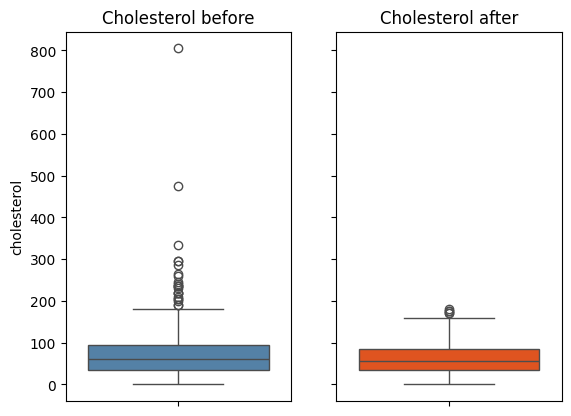

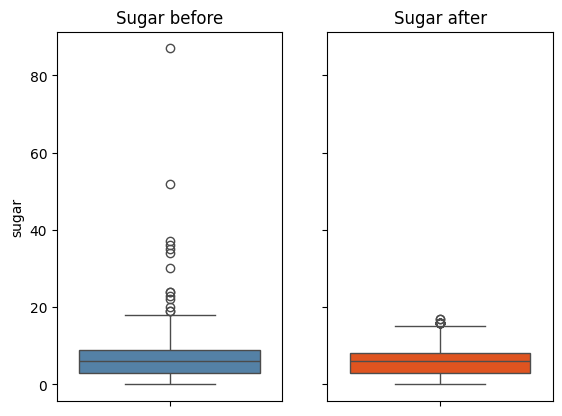

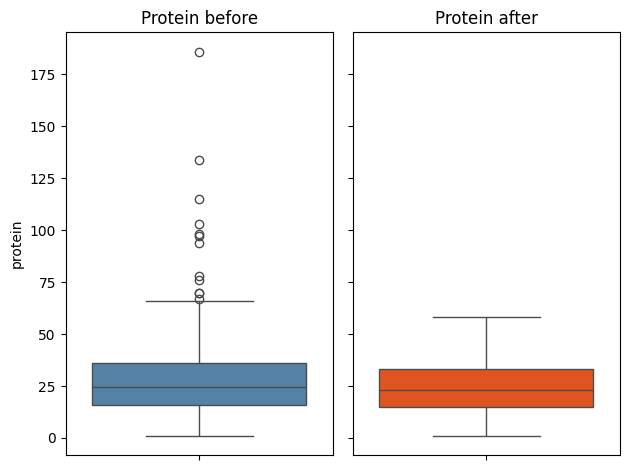

In [12]:
fig, ax1 = plt.subplots(1, 2,sharey = True)
sns.boxplot(data=df,y="cholesterol" , color="steelblue",ax=ax1[0])
ax1[0].set_title("Cholesterol before")

sns.boxplot(data=clean_df,y="cholesterol" , color="orangered",ax=ax1[1])
ax1[1].set_title("Cholesterol after")

fig, ax2 = plt.subplots(1, 2,sharey = True)
sns.boxplot(data=df,y="sugar" , color="steelblue",ax=ax2[0])
ax2[0].set_title("Sugar before")

sns.boxplot(data=clean_df,y="sugar" , color="orangered",ax=ax2[1])
ax2[1].set_title("Sugar after")

fig, ax3 = plt.subplots(1, 2,sharey = True)
sns.boxplot(data=df,y="protein" ,color="steelblue",ax=ax3[0])
ax3[0].set_title("Protein before")

sns.boxplot(data=clean_df,y="protein" , color="orangered",ax=ax3[1])
ax3[1].set_title("Protein after")

fig.tight_layout()

plt.show()

It's evident that before removing outliers, the data exhibits greater spread with numerous outliers that could potentially skew our analysis. After removal, the data spread becomes more constrained, and the remaining outliers fall closer to Q3 + IQR. Consequently, the impact of these outliers on our analysis is likely to be minimal.

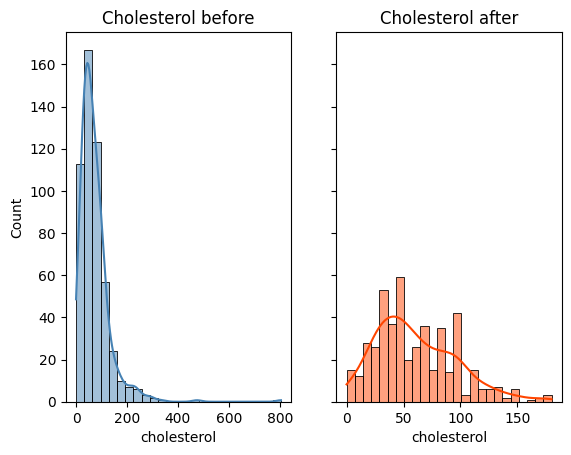

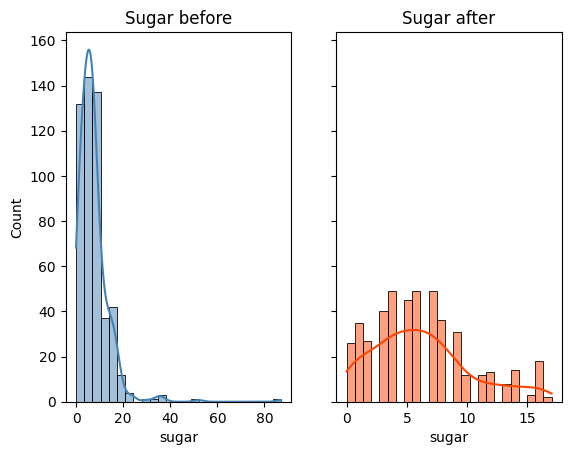

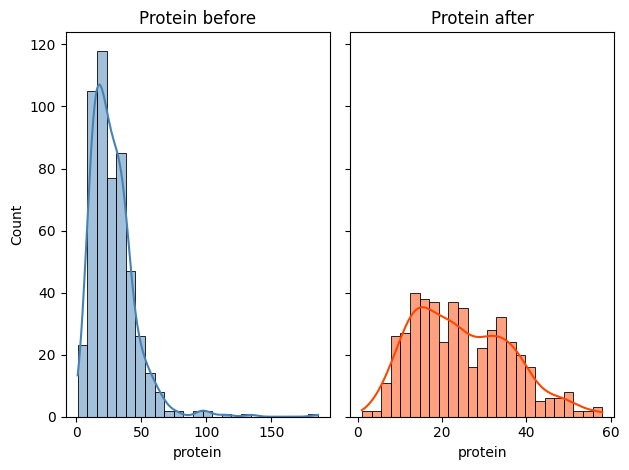

In [11]:
fig, ax1 = plt.subplots(1, 2,sharey = True)
sns.histplot(data=df,x="cholesterol" , color="steelblue",ax=ax1[0],bins=25, kde=True)
ax1[0].set_title("Cholesterol before")

sns.histplot(data=clean_df,x="cholesterol" , color="orangered",ax=ax1[1],bins=25, kde=True)
ax1[1].set_title("Cholesterol after")

fig, ax2 = plt.subplots(1, 2,sharey = True)
sns.histplot(data=df,x="sugar" , color="steelblue",ax=ax2[0],bins=25, kde=True)
ax2[0].set_title("Sugar before")

sns.histplot(data=clean_df,x="sugar" , color="orangered",ax=ax2[1],bins=25, kde=True)
ax2[1].set_title("Sugar after")

fig, ax3 = plt.subplots(1, 2,sharey = True)
sns.histplot(data=df,x="protein" ,color="steelblue",ax=ax3[0],bins=25, kde=True)
ax3[0].set_title("Protein before")

sns.histplot(data=clean_df,x="protein" , color="orangered",ax=ax3[1],bins=25, kde=True)
ax3[1].set_title("Protein after")

fig.tight_layout()

plt.show()

The histograms clearly illustrate how outlier removal condenses the data's mode. While the data may not follow a normal distribution, the skewness is noticeably reduced, and the overall distribution appears more uniform compared to before.

# **AGGREGATE FUNCTIONS**

"We'll create DataFrames to store the results, from the Agrregate functions, before and after outlier removal. This will help us with  visualization of the outlier removal impact at the analysis conclusion."

In [13]:
before_list=[] #create an empty list to store the "before" results
before_df = pd.DataFrame() #create an empty dataframe to concat the "before" results

#print some basic statistical analysis for the first dataframe for the three columns
for x in column:
  i=1
  aggregations = {
    'Mean': df[x].mean(),
    'Max': df[x].max(),
    'Min': df[x].min(),
    'Median': df[x].median(),
    'std':df[x].std(),
    'var':df[x].var(),
    }
  aggregated_data_before = pd.DataFrame(aggregations, index=[x])
  before_list.append(aggregated_data_before) #fill the list with the "before" results
  print(aggregated_data_before)

before_df= pd.concat(before_list) #send the "before" results to the dataframe

                  Mean  Max  Min  Median        std          var
cholesterol  72.456311  805    0    60.0  63.160406  3989.236901
           Mean  Max  Min  Median       std        var
sugar  7.262136   87    0     6.0  6.761301  45.715198
              Mean    Max  Min  Median        std        var
protein  27.891051  186.0  1.0    24.5  17.683921  312.72105


In [14]:
after_list=[]#create an empty list to store the "after" results
after_df = pd.DataFrame() #create an empty dataframe to concat the "after" results

#print some basic statistical analysis for the clean dataframe for the three columns
for x in column:
  aggregations = {
    'Mean': clean_df[x].mean(),
    'Max': clean_df[x].max(),
    'Min': clean_df[x].min(),
    'Median': clean_df[x].median(),
    'std':clean_df[x].std(),
    'var':clean_df[x].var()
  }
  aggregated_data_after = pd.DataFrame(aggregations, index=[x])
  after_list.append(aggregated_data_after) #fill the list with the "after" results
  print(aggregated_data_after)

after_df= pd.concat(after_list) #send the "after" results to the dataframe

                  Mean  Max  Min  Median        std          var
cholesterol  60.479744  180    0    55.0  35.472002  1258.262944
           Mean  Max  Min  Median       std       var
sugar  6.202559   17    0     6.0  4.090263  16.73025
              Mean   Max  Min  Median        std         var
protein  24.654584  58.0  1.0    23.0  11.557182  133.568467


In [15]:
#make a new column "time" with values "before" and "after" before the merge
before_df["time"]="before"
after_df["time"]="after"
data = pd.concat([before_df,after_df],axis=0) #merge the two dataframes into one

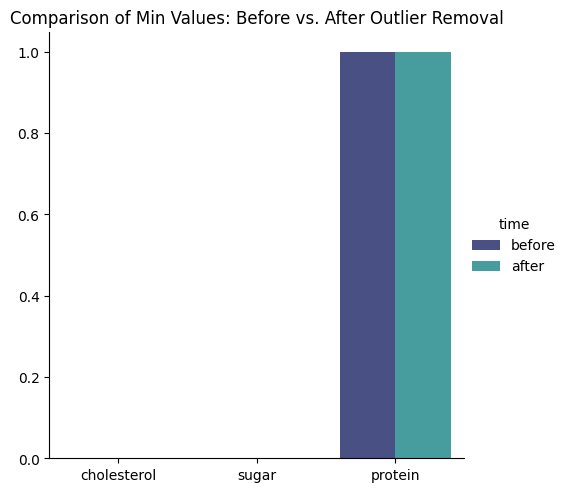

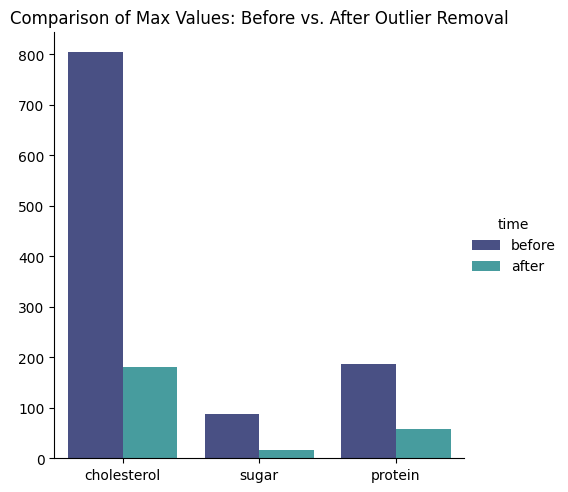

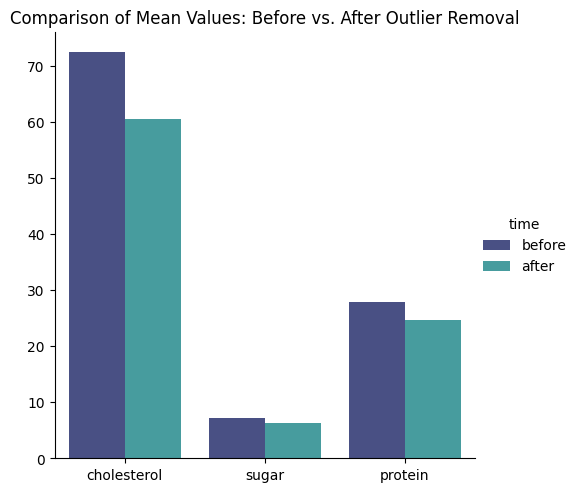

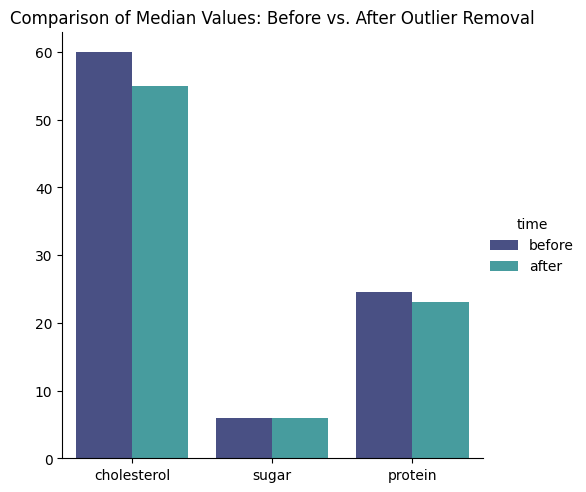

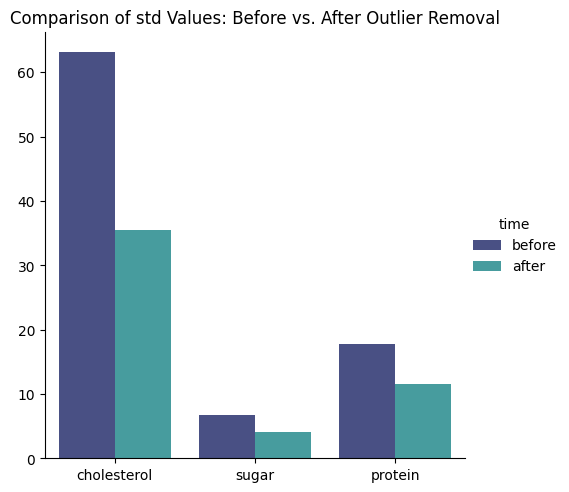

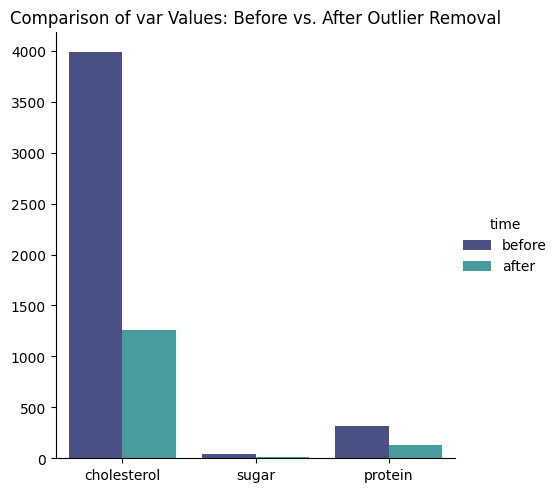

In [16]:
#print barplot for every column, with different colours for before and after

for x in data[["Min", "Max", "Mean","Median", "std", "var"]]:

  sns.catplot(
    data=data,
    x=data.index,
    y=x,
    hue="time",
    kind="bar",
    palette="mako",
  ).set(title=(f'Comparison of {x} Values: Before vs. After Outlier Removal')).set(xlabel=None).set(ylabel=None)

plt.show()


# **CONCLUSIONS**

The removal of outliers had a clear impact on our data. As expected, the maximum (**MAX**) value dropped significantly since we removed values above a certain threshold in all three columns. However, since we didn't remove values below a threshold, the minimum (**MIN**) value remained unchanged. Interestingly, the median(**MEDIAN**) changed only slightly, suggesting that removing outliers had minimal influence on the central tendency of the data and was probably a good decision.

On the other hand, we observed significant decreases in the  **MEAN**, standard deviation (**STD**), and variance (**VAR**) values. This indicates that the data became more symmetrical, with the **MEAN** values now closer to the **MEDIAN**. This observation is further supported by the smaller **STD** and **VAR** values, signifying a more compact data set. Consequently, our subsequent analysis is likely to be more reliable as outliers no longer skew the data.